### Machine Learning - Linear Regression Single Variable

Hemant Thapa

Single variable linear regression is a key technique for any data analysis. We can predict continuous variable outcomes using linear regression if the data has an approximately linear shape, i.e. it has the shape of a line.

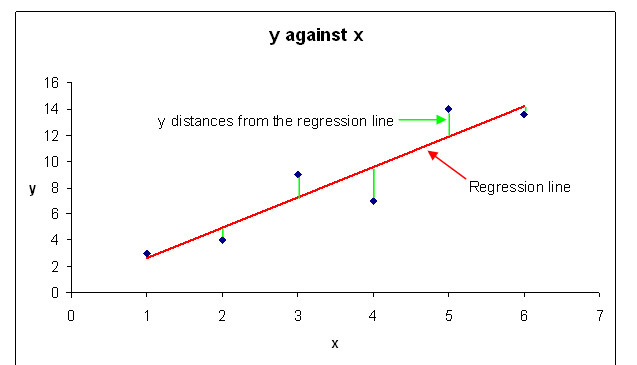

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
import warnings
warnings.filterwarnings("ignore")

#### 1. Data Set

In [2]:
#dataset for home prices
dataset = {"area":[2600,3000,3200,3600,4000], 
           "price":[550000,565000,610000,680000,725000]}

#### 2. Data Frame

In [3]:
#creating dataframe
df = pd.DataFrame(dataset)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


#### 3. Scatter plot for understanding the distribution of my data point

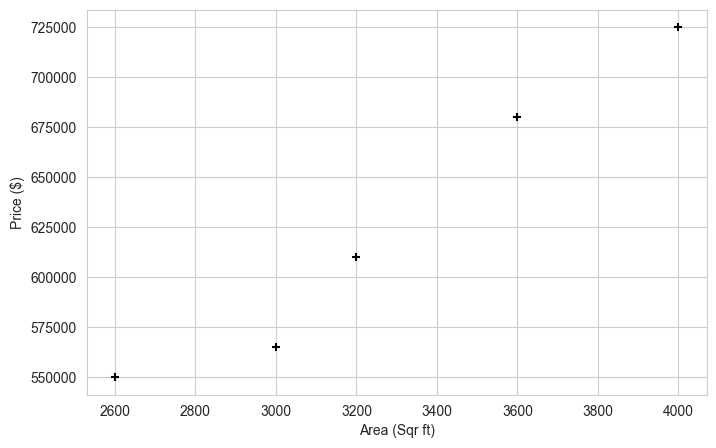

In [4]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.scatter(df.area, df.price, color="black", marker="+")
plt.xlabel("Area (Sqr ft)")
plt.ylabel("Price ($)")
plt.show()

After reading this plot, distribution is suitable for linear regression model, and now we can use linear regression. 

#### 4. Training Model

In [5]:
#Creating linear regression object
reg = linear_model.LinearRegression()
#Training linear regression model
reg.fit(df[["area"]],df.price)

LinearRegression()

#### 5. Price Prediction

In [6]:
#Predicting price of home
reg.predict([[3300]])

array([628715.75342466])

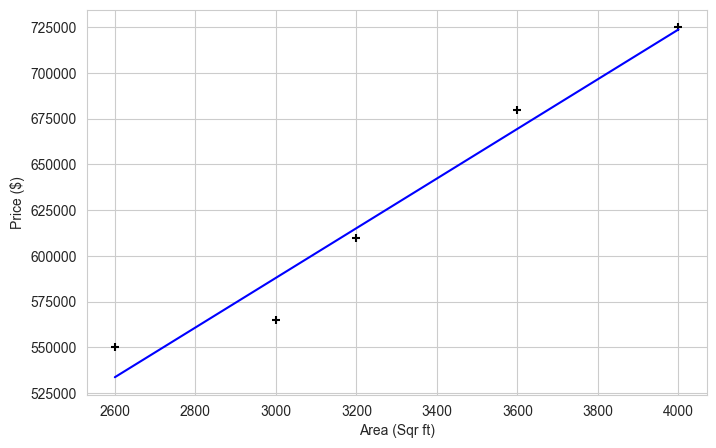

In [7]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))

#scatter data
plt.scatter(df.area, df.price, color="black", marker="+")
#Prediction mean
plt.plot(df.area, reg.predict(df[["area"]]), color="blue")
plt.xlabel("Area (Sqr ft)")
plt.ylabel("Price ($)")
plt.show()

Always select the one line where total sum of error is minimum

#### 6. Understanding Linear Model

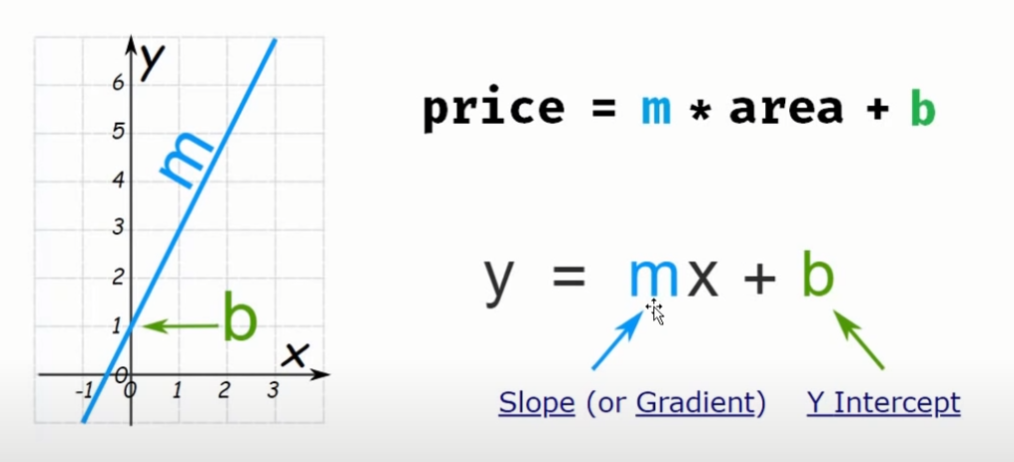

In [8]:
#Value of coefficent or m
#y = mx + b
reg.coef_

array([135.78767123])

In [9]:
#value of intercept or b
#y = mx + b
reg.intercept_

180616.43835616432

In [10]:
m = reg.coef_
b = reg.intercept_
x = 3300
y = m * x + b
print(y) #prediction

[628715.75342466]


#### 7. Data comparision

In [11]:
print(y)

[628715.75342466]


In [12]:
reg.predict([[3300]])

array([628715.75342466])

In [13]:
y == reg.predict([[3300]])

array([ True])

#### 8. Testing random data

In [14]:
#Creating random area for predicting price
n = random.randint(1000,10000000)
print(n)

373886


In [15]:
#Pridiction of price
reg.predict([[n]])

array([50949725.68493151])

In [16]:
#Using equation of line for predicting price
# y = mx + b 
m = reg.coef_
b = reg.intercept_
x = n # random area 
y = m * x + b
print(y) #prediction

[50949725.68493151]


#### 9. Predicting prices with respect to area from previous train model

In [17]:
#Creating new dataset for prediction
dataset2 = {"area":[1000,1500,2000,2500,2700,2820,3000,5500]}
#Creating dataframe
df_2 = pd.DataFrame(dataset2)
df_2

,area
0,1000
1,1500
2,2000
3,2500
4,2700
5,2820
6,3000
7,5500


In [18]:
#Price prediction from regression model
price = reg.predict(df_2)
price

array([316404.10958904, 384297.94520548, 452191.78082192, 520085.61643836,
       547243.15068493, 563537.67123288, 587979.45205479, 927448.63013699])

In [19]:
#creating new columns in dataframe
df_2["price"] = price

In [20]:
#printing dataframe
df_2

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2000,452191.780822
3,2500,520085.616438
4,2700,547243.150685
5,2820,563537.671233
6,3000,587979.452055
7,5500,927448.630137


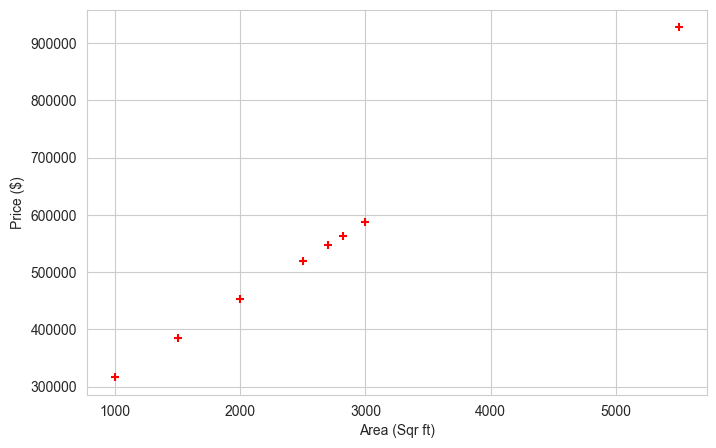

In [21]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.scatter(df_2.area, df_2.price, color="red", marker="+")
plt.xlabel("Area (Sqr ft)")
plt.ylabel("Price ($)")
plt.show()

#### 10. Excercise - Predict canada's per capita income in year 2023

In [22]:
#Importing dataset and creating dataframe
df_canada = pd.read_csv("canada_per_capita_income.csv")
df_canada.tail(5)

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [23]:
income = df_canada["per capita income (US$)"]
year = df_canada["year"]
dataset_income = {"income":income, "year":year}
df = pd.DataFrame(dataset_income)
df.tail(5)

,income,year
42,42665.25597,2012
43,42676.46837,2013
44,41039.89360,2014
45,35175.18898,2015
46,34229.19363,2016


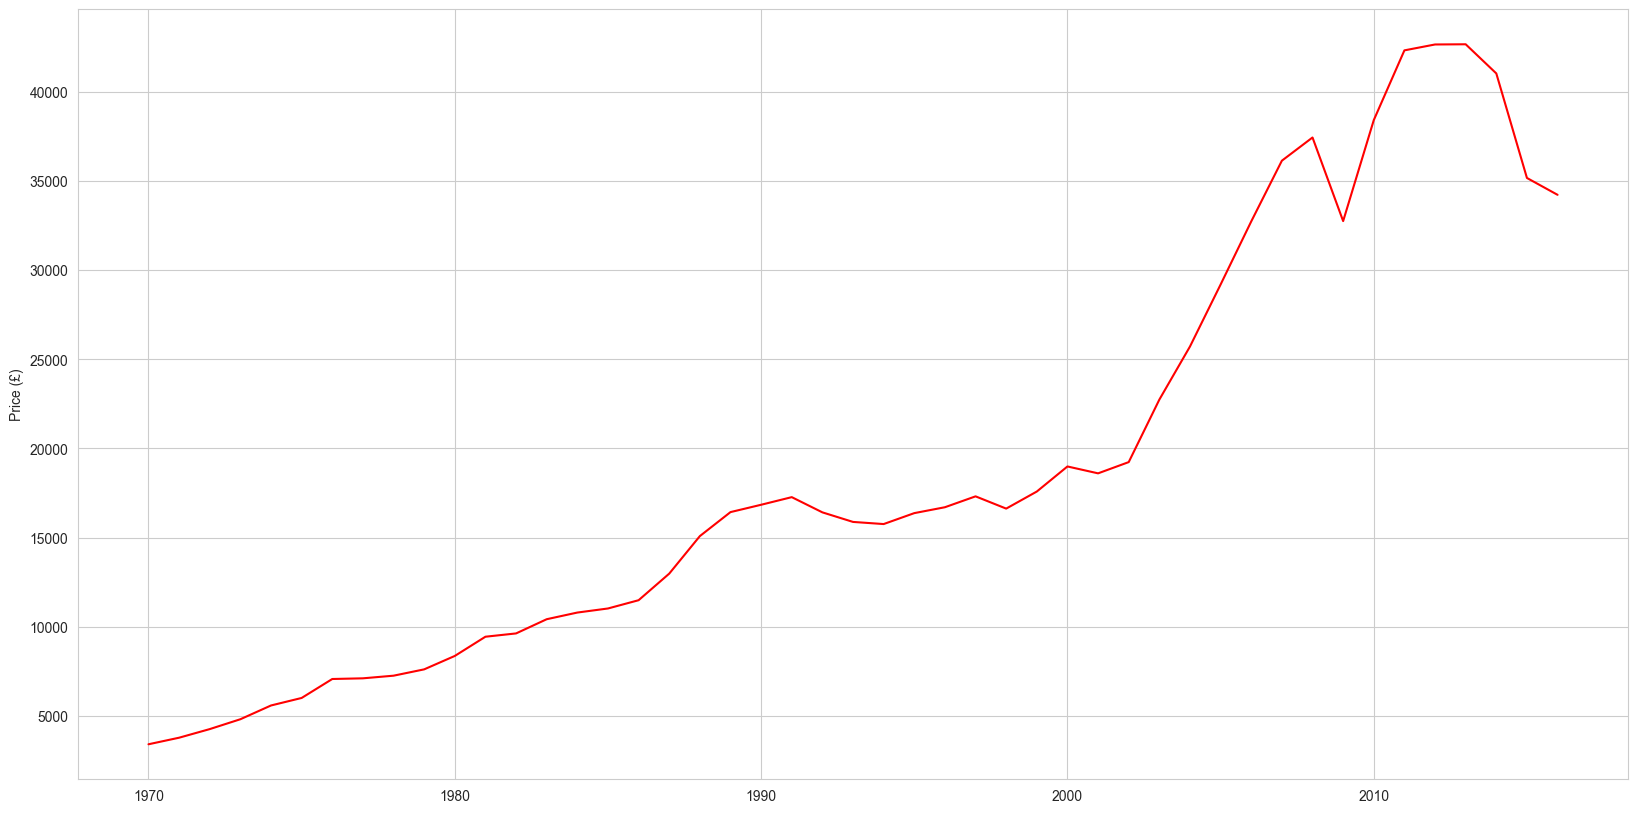

In [24]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.plot(year, income,color="red")
plt.ylabel("Price (£)")
plt.show()

In [25]:
#Creating linear regression object
reg = linear_model.LinearRegression()
#Training linear regression model
reg.fit(df[["year"]],df.income)

LinearRegression()

In [26]:
#Predicting income
reg.predict([[2023]])

array([43774.08932009])

#### 11. House prices in Uk by Country

In [27]:
#Importing dataset and converting into dataframe
df_uk = pd.read_csv("uk_housing_price_2022.csv")
df_uk.head(5)

,Months,England,Wales,Scotland,Northern Ireland
0,1/1/05,158572,123815,93982,111920
1,1/2/05,158609,121070,93554,111920
2,1/3/05,159642,123052,96638,111920
3,1/4/05,161336,124088,102739,116004
4,1/5/05,163064,126541,103815,116004


In [28]:
#Checking columns and rows
df_uk.shape

(214, 5)

In [29]:
#Checking data types
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Months            214 non-null    object
 1   England           214 non-null    int64 
 2   Wales             214 non-null    int64 
 3   Scotland          214 non-null    int64 
 4   Northern Ireland  214 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.5+ KB


In [30]:
#Checking nand returns the number of missing values in the dataset
df_uk.isnull().sum()

Months              0
England             0
Wales               0
Scotland            0
Northern Ireland    0
dtype: int64

In [31]:
#Checking types columns
df_uk.columns

Index(['Months', 'England', 'Wales ', 'Scotland ', 'Northern Ireland'], dtype='object')

In [32]:
#removing white space from columns
df_uk.columns = df_uk.columns.str.lower()
df_uk.columns = df_uk.columns.str.strip()
df_uk.columns

Index(['months', 'england', 'wales', 'scotland', 'northern ireland'], dtype='object')

In [33]:
months = df_uk['months']
england = df_uk["england"]
wales = df_uk["wales"]
scotland = df_uk["scotland"]
nothern_ireland = df_uk["northern ireland"]

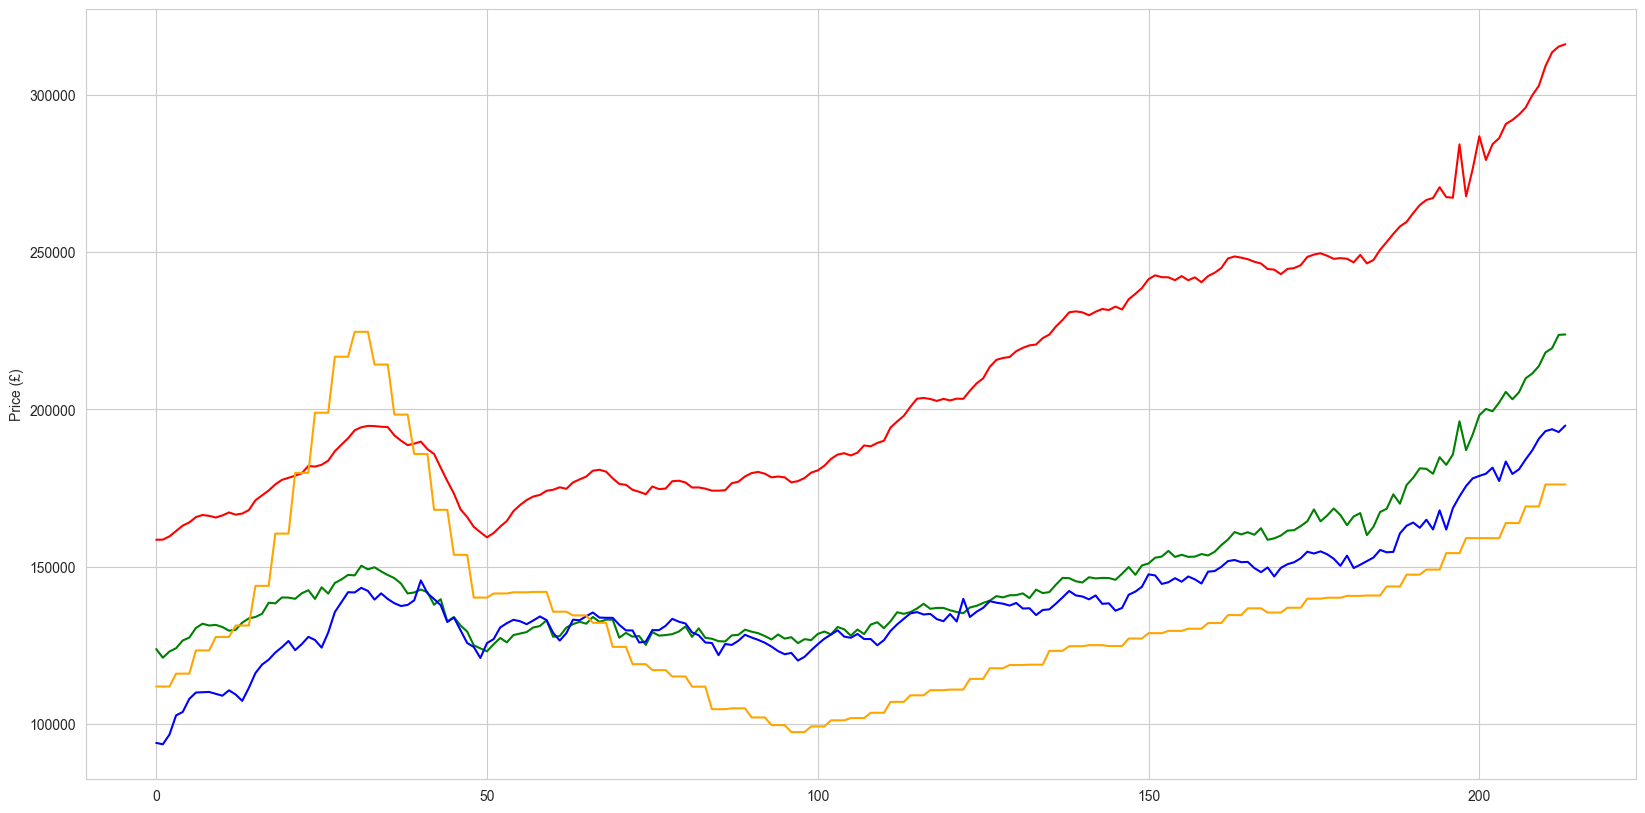

In [34]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.plot(england,color="red")
plt.plot(wales, color="green")
plt.plot(scotland, color="blue")
plt.plot(nothern_ireland, color="orange")
plt.ylabel("Price (£)")
plt.show()

#### Distributing data in following years

In [35]:
# Iterate over the Series in increments of 12
for i in range(0, len(df_uk), 12):
    print(df_uk[i:i+12])
    print()

     months  england   wales  scotland  northern ireland
0    1/1/05   158572  123815     93982            111920
1    1/2/05   158609  121070     93554            111920
2    1/3/05   159642  123052     96638            111920
3    1/4/05   161336  124088    102739            116004
4    1/5/05   163064  126541    103815            116004
5    1/6/05   164069  127477    107989            116004
6    1/7/05   165756  130529    110003            123386
7    1/8/05   166440  131874    110101            123386
8    1/9/05   166168  131307    110188            123386
9   1/10/05   165637  131511    109598            127674
10  1/11/05   166303  130826    108994            127674
11  1/12/05   167244  129673    110714            127674

     months  england   wales  scotland  northern ireland
12   1/1/06   166544  129914    109380            131302
13   1/2/06   166896  132218    107355            131302
14   1/3/06   168001  133581    111484            131302
15   1/4/06   171129  134018  

In [36]:
data_list = []
# Iterate over the Series in increments of 12
for i in range(0, len(df_uk), 12):
    data_list.append(df_uk[i:i+12])

In [37]:
#Year 2005
data_list[0].iloc[0:12,1:5]

,england,wales,scotland,northern ireland
0,158572,123815,93982,111920
1,158609,121070,93554,111920
2,159642,123052,96638,111920
3,161336,124088,102739,116004
4,163064,126541,103815,116004
5,164069,127477,107989,116004
6,165756,130529,110003,123386
7,166440,131874,110101,123386
8,166168,131307,110188,123386
9,165637,131511,109598,127674


In [38]:
#Year 2005 describe
data_list[0].iloc[0:12,1:5].describe()

,england,wales,scotland,northern ireland
count,12.000000,12.000000,12.000000,12.000000
mean,163570.000000,127646.916667,104859.583333,119746.000000
std,3240.674116,3833.868933,6641.831202,6424.773586
min,158572.000000,121070.000000,93554.000000,111920.000000
25%,160912.500000,124019.750000,101213.750000,114983.000000
50%,164853.000000,128575.000000,108491.500000,119695.000000
75%,166201.750000,130946.250000,110027.500000,124458.000000
max,167244.000000,131874.000000,110714.000000,127674.000000


In [39]:
#Year 2005 mean
data_list[0].iloc[0:12,1:5].mean()

england             163570.000000
wales               127646.916667
scotland            104859.583333
northern ireland    119746.000000
dtype: float64

In [40]:
#Year 2005 mean
data_list[0].iloc[0:12,1:5].mean()

england             163570.000000
wales               127646.916667
scotland            104859.583333
northern ireland    119746.000000
dtype: float64

In [41]:
#Creating data set of mean value
data_set = {"2005":data_list[0].mean(),
"2006":data_list[1].mean(),
"2007":data_list[2].mean(),
"2008":data_list[3].mean(),
"2009":data_list[4].mean(),
"2010":data_list[5].mean(),
"2011":data_list[6].mean(),
"2012":data_list[7].mean(),
"2013":data_list[8].mean(),
"2014":data_list[9].mean(),
"2015":data_list[10].mean(),
"2016":data_list[11].mean(),
"2017":data_list[12].mean(),
"2018":data_list[13].mean(),
"2019":data_list[14].mean(),
"2020":data_list[15].mean(),
"2021":data_list[16].mean(),
"2022":data_list[17].mean(),
}

In [42]:
house_price = pd.DataFrame(data_set)
house_price

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
england,163570.000000,174351.500000,190025.583333,182379.916667,166558.666667,177472.666667,175230.000000,177488.000000,182581.416667,197771.083333,211174.750000,227337.166667,238161.166667,245017.250000,246634.833333,253547.916667,275360.833333,302919.1
wales,127646.916667,137162.416667,146273.833333,138651.333333,127657.583333,130973.083333,128410.666667,127898.333333,128423.250000,134879.083333,138631.500000,144425.250000,150566.250000,157401.333333,163480.083333,169437.000000,190724.000000,213440.2
scotland,104859.583333,119488.666667,137043.083333,136634.000000,129881.083333,131902.000000,129489.250000,125248.916667,125754.583333,131664.166667,136887.416667,138749.250000,142835.500000,149104.000000,151815.833333,156087.250000,172362.250000,188011.9
northern ireland,119746.000000,153897.500000,213660.000000,176514.250000,141384.250000,131723.750000,115786.250000,102858.000000,99925.250000,107616.750000,115438.000000,122972.416667,127610.750000,133442.500000,138093.250000,143190.250000,155394.500000,170361.1


In [43]:
#indexing into list of 2005
#mean value of 2005 for england, wales, scotland, nothern ireland
data_set["2005"]

england             163570.000000
wales               127646.916667
scotland            104859.583333
northern ireland    119746.000000
dtype: float64

In [44]:
#indexing inside 2005 list for checking vlaue of england
data_set["2005"]["england"]

163570.0

#### Seprating data and store in List 

In [45]:
# Create empty lists to store the data for England and Wales
england_data = []
wales_data = []

# Iterate over the data set
for year, data in data_set.items():
    # Extract the data for England and Wales for each year and append it to the respective lists
    england_data.append(data['england'])
    wales_data.append(data['wales'])

# Print the England and Wales data
print(england_data)
print(wales_data)

[163570.0, 174351.5, 190025.58333333334, 182379.91666666666, 166558.66666666666, 177472.66666666666, 175230.0, 177488.0, 182581.41666666666, 197771.08333333334, 211174.75, 227337.16666666666, 238161.16666666666, 245017.25, 246634.83333333334, 253547.91666666666, 275360.8333333333, 302919.1]
[127646.91666666667, 137162.41666666666, 146273.83333333334, 138651.33333333334, 127657.58333333333, 130973.08333333333, 128410.66666666667, 127898.33333333333, 128423.25, 134879.08333333334, 138631.5, 144425.25, 150566.25, 157401.33333333334, 163480.08333333334, 169437.0, 190724.0, 213440.2]


In [46]:
# Extract the scotland data using a list comprehension
scotland_data = [data['scotland'] for year, data in data_set.items()]
# Extract the northern ireland data using a list comprehension
northern_ireland_data = [data['northern ireland'] for year, data in data_set.items()]

# Print the scotland data
print(scotland_data)
# Print the northern ireland data
print(northern_ireland_data)

[104859.58333333333, 119488.66666666667, 137043.08333333334, 136634.0, 129881.08333333333, 131902.0, 129489.25, 125248.91666666667, 125754.58333333333, 131664.16666666666, 136887.41666666666, 138749.25, 142835.5, 149104.0, 151815.83333333334, 156087.25, 172362.25, 188011.9]
[119746.0, 153897.5, 213660.0, 176514.25, 141384.25, 131723.75, 115786.25, 102858.0, 99925.25, 107616.75, 115438.0, 122972.41666666667, 127610.75, 133442.5, 138093.25, 143190.25, 155394.5, 170361.1]


#### Creating new data frame

In [99]:
year = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_housing = pd.DataFrame(year)
df_housing.rename(columns={0: 'year'}, inplace=True)
df_housing['year'] = df_housing['year'].astype(str)
# Rename the column headings
df_housing.rename(columns={0: 'year'}, inplace=True)
df_housing["england"] = england_data
df_housing["wales"] = wales_data
df_housing["scotland"] = scotland_data
df_housing["northern_ireland"] = northern_ireland_data
df_housing

,year,england,wales,scotland,northern_ireland
0,2005,163570.000000,127646.916667,104859.583333,119746.000000
1,2006,174351.500000,137162.416667,119488.666667,153897.500000
2,2007,190025.583333,146273.833333,137043.083333,213660.000000
3,2008,182379.916667,138651.333333,136634.000000,176514.250000
4,2009,166558.666667,127657.583333,129881.083333,141384.250000
5,2010,177472.666667,130973.083333,131902.000000,131723.750000
6,2011,175230.000000,128410.666667,129489.250000,115786.250000
7,2012,177488.000000,127898.333333,125248.916667,102858.000000
8,2013,182581.416667,128423.250000,125754.583333,99925.250000
9,2014,197771.083333,134879.083333,131664.166667,107616.750000


#### England

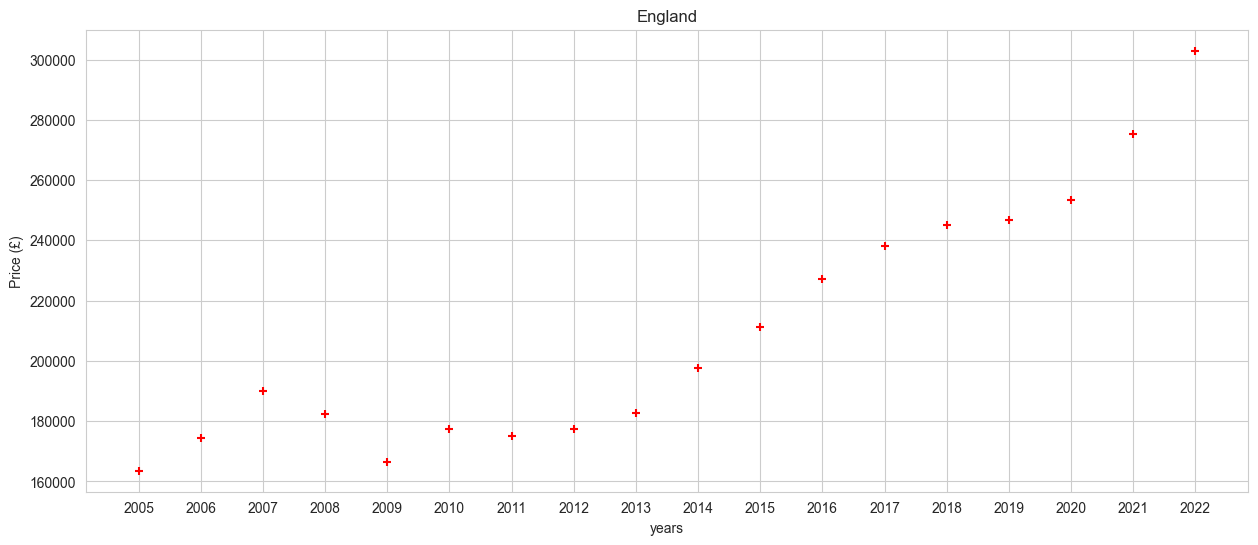

In [86]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
#scatter data
plt.scatter(df_housing.year, df_housing.england, color="red", marker="+")
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("England")
plt.show()

In [89]:
#Creating linear regression object
reg = linear_model.LinearRegression()
#Training linear regression model
reg.fit(df_housing[["year"]],df_housing.england)

LinearRegression()

In [90]:
#Predicting average house price for 2023
reg.predict([[2023]])

array([278307.50424837])

#### England Average House Price Pridiction

In [92]:
#Creating new dataset for prediction
prediction_years = {"year":[2023,2024,2025,2026,2027,2028,2029,2030]}
df_prediction = pd.DataFrame(prediction_years)
df_prediction['year'] = df_prediction['year'].astype(str)
#Creating dataframe
df_prediction = pd.DataFrame(prediction_years)
#prediction of price
price = reg.predict(df_prediction)
df_prediction["price"] = price
df_prediction

,year,price
0,2023,278307.504248
1,2024,285453.429549
2,2025,292599.354850
3,2026,299745.280151
4,2027,306891.205452
5,2028,314037.130753
6,2029,321183.056054
7,2030,328328.981355


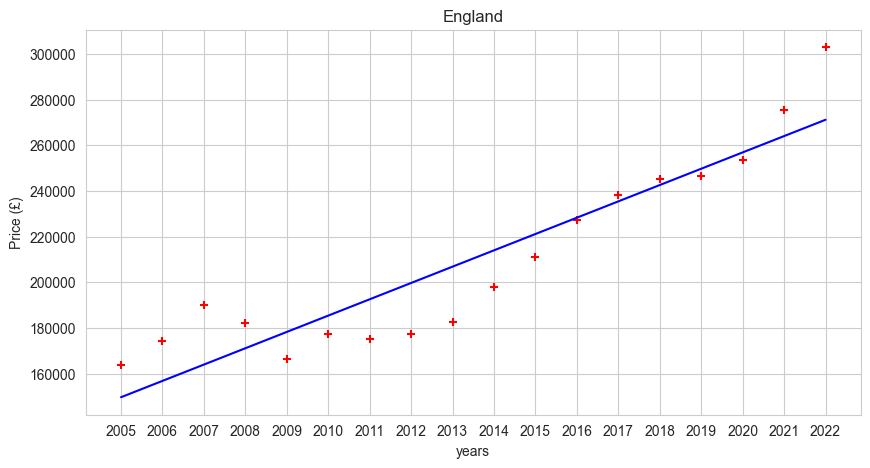

In [98]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
#scatter data
plt.scatter(df_housing.year, df_housing.england, color="red", marker="+")
plt.plot(df_housing.year, reg.predict(df_housing[["year"]]), color="blue")
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("England")
plt.show()

In [151]:
f"{((302919.100000-278307.504248)/302919.100000)*100}%"

'8.124808159010112%'

#### Wales

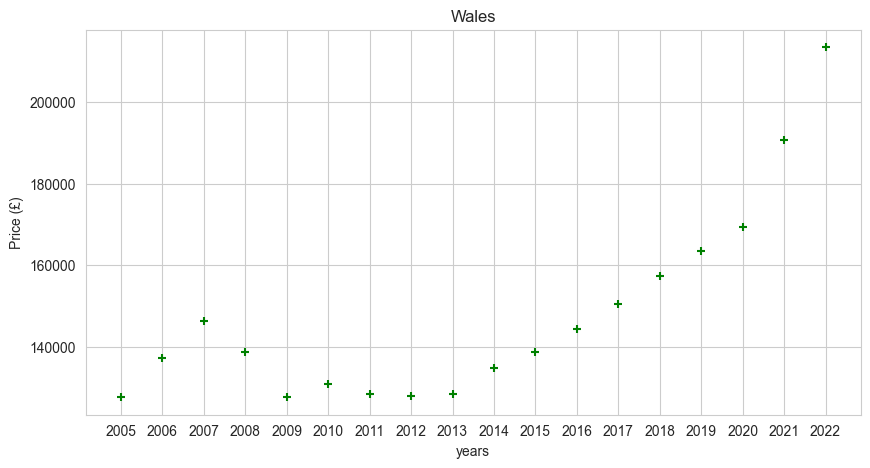

In [106]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.scatter(df_housing.year,df_housing.wales, color="green", marker="+")
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("Wales")
plt.show()

In [108]:
#Creating linear regression object
reg = linear_model.LinearRegression()
#Training linear regression model
reg.fit(df_housing[["year"]],df_housing.wales)

LinearRegression()

In [109]:
#Predicting average house price for 2023
reg.predict([[2023]])

array([180498.56023965])

In [111]:
#Creating new dataset for prediction
prediction_years = {"year":[2023,2024,2025,2026,2027,2028,2029,2030]}
#Creating dataframe
df_prediction = pd.DataFrame(prediction_years)
#prediction of price
price = reg.predict(df_prediction)
df_prediction["price"] = price
df_prediction

,year,price
0,2023,180498.560240
1,2024,183965.764729
2,2025,187432.969218
3,2026,190900.173707
4,2027,194367.378196
5,2028,197834.582685
6,2029,201301.787175
7,2030,204768.991664


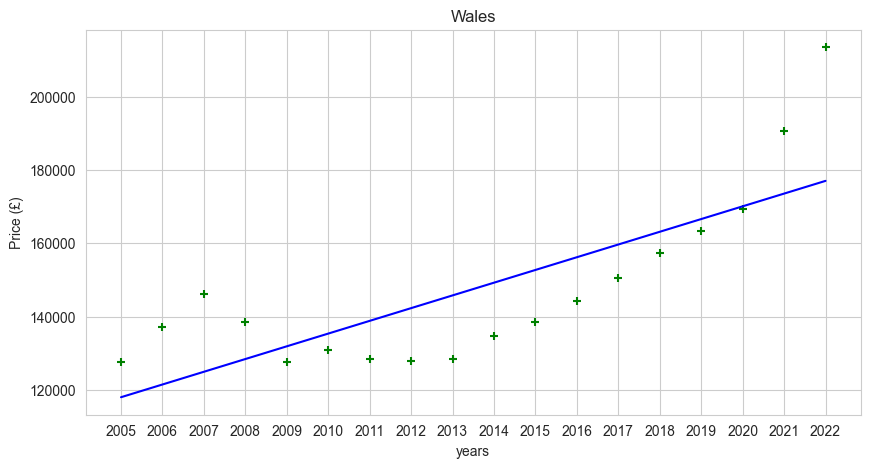

In [113]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.scatter(df_housing.year, df_housing.wales, color="green", marker="+")
plt.plot(df_housing.year, reg.predict(df_housing[["year"]]), color="blue")
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("Wales")
plt.show()

In [153]:
f"{((213440.200000-180498.560240)/213440.200000)*100}%" 

'15.43366233727293%'

#### Scotland

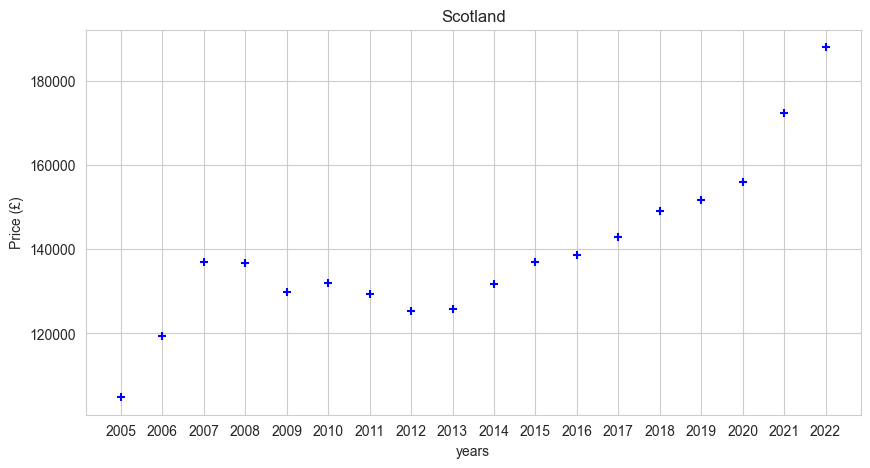

In [114]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.scatter(df_housing.year, df_housing.scotland, color="blue", marker="+")
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("Scotland")
plt.show()

In [115]:
#Creating linear regression object
reg = linear_model.LinearRegression()
#Training linear regression model
reg.fit(df_housing[["year"]],df_housing.scotland)

LinearRegression()

In [116]:
#Predicting average house price for 2023
reg.predict([[2023]])

array([168322.60904139])

In [118]:
#Creating new dataset for prediction
prediction_years = {"year":[2023,2024,2025,2026,2027,2028,2029,2030]}
#Creating dataframe
df_prediction = pd.DataFrame(prediction_years)
#prediction of price
price = reg.predict(df_prediction)
df_prediction["price"] = price
df_prediction

,year,price
0,2023,168322.609041
1,2024,171375.171786
2,2025,174427.734532
3,2026,177480.297277
4,2027,180532.860022
5,2028,183585.422767
6,2029,186637.985512
7,2030,189690.548257


In [148]:
f"{(189690.548257 - 168322.609041) / 189690.548257 * 100}%"

'11.264630426946681%'

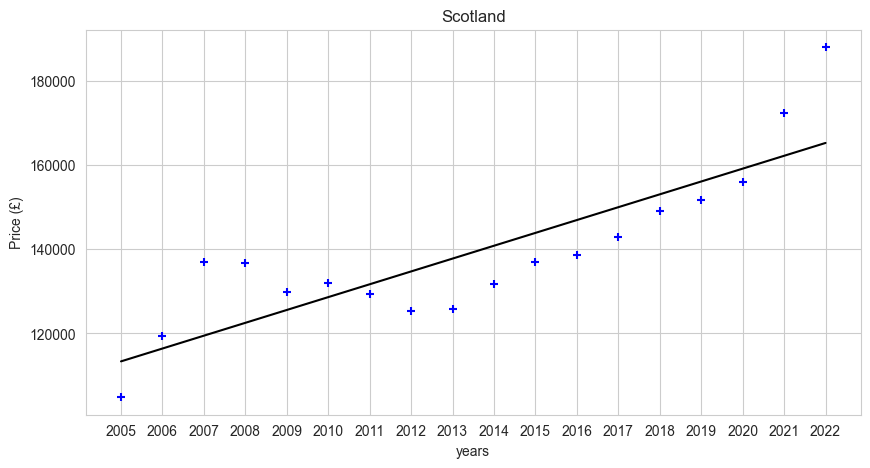

In [122]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.scatter(df_housing.year, df_housing.scotland, color="blue", marker="+")
plt.plot(df_housing.year, reg.predict(df_housing[["year"]]), color="black")
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("Scotland")
plt.show()

#### Northern Ireland

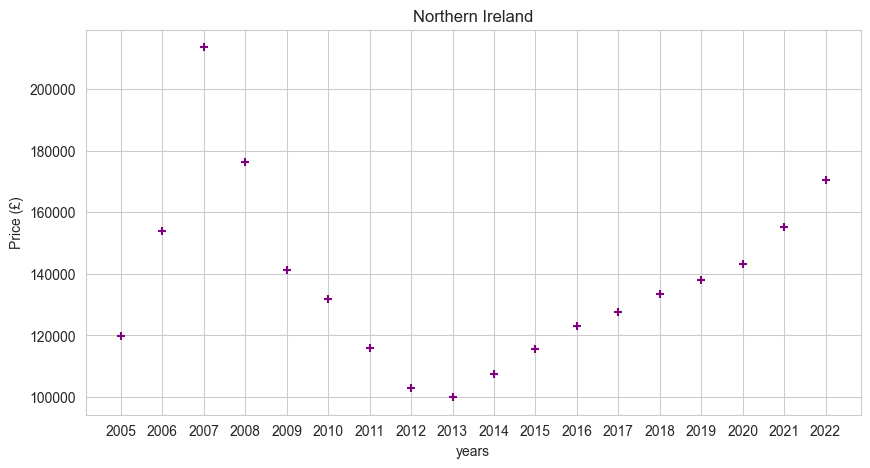

In [124]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.scatter(df_housing.year, df_housing.northern_ireland, color="purple", marker="+")
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("Northern Ireland")
plt.show()

In [125]:
#Creating linear regression object
reg = linear_model.LinearRegression()
#Training linear regression model
reg.fit(df_housing[["year"]],df_housing.northern_ireland)

LinearRegression()

In [126]:
#Predicting average house price for 2023
reg.predict([[2023]])

array([132546.60010893])

In [128]:
#Creating new dataset for prediction
prediction_years = {"year":[2023,2024,2025,2026,2027,2028,2029,2030]}
#Creating dataframe
df_prediction = pd.DataFrame(prediction_years)
#prediction of price
price = reg.predict(df_prediction)
df_prediction["price"] = price
df_prediction

,year,price
0,2023,132546.600109
1,2024,132056.682187
2,2025,131566.764264
3,2026,131076.846342
4,2027,130586.928420
5,2028,130097.010498
6,2029,129607.092575
7,2030,129117.174653


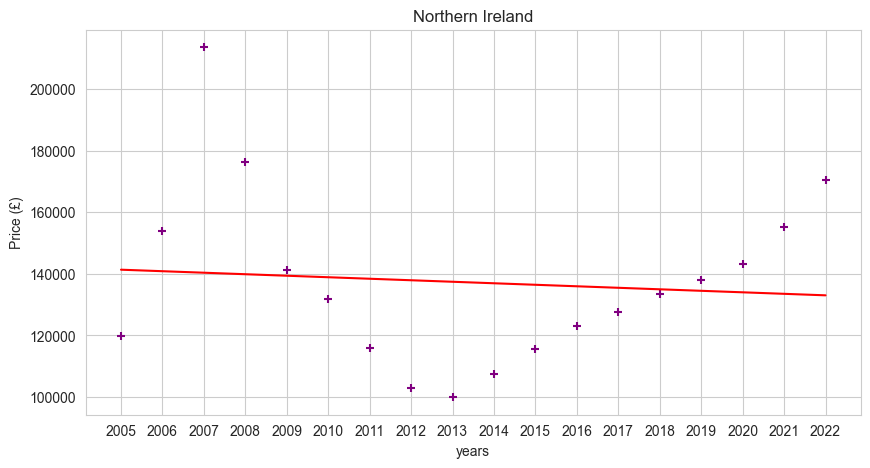

In [132]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.scatter(df_housing.year, df_housing.northern_ireland, color="purple", marker="+")
plt.plot(df_housing.year, reg.predict(df_housing[["year"]]), color="red")
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("Northern Ireland")
plt.show()

#### Average House Price in United Kingdom

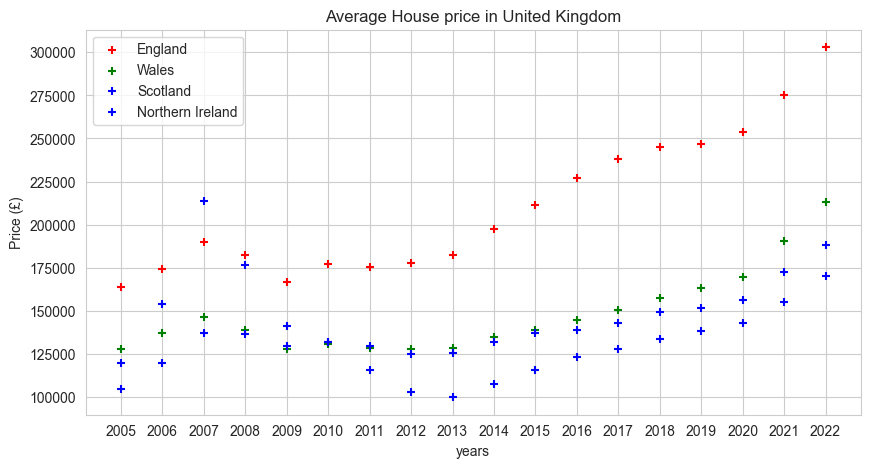

In [133]:
#plotting graph for understanding the distribution of data point
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.scatter(df_housing.year, df_housing.england, color="red", marker="+")
plt.scatter(df_housing.year, df_housing.wales, color="green", marker="+")
plt.scatter(df_housing.year, df_housing.scotland, color="blue", marker="+")
plt.scatter(df_housing.year, df_housing.northern_ireland, color="blue", marker="+")
plt.legend(["England", "Wales", "Scotland", "Northern Ireland"])
plt.xlabel("years")
plt.ylabel("Price (£)")
plt.title("Average House price in United Kingdom")
plt.show()